# <center> 1. Prediction using Supervised Learning </center>

Dataset : http://bit.ly/w-data

<u>Objective: Predict the percentage of an student based on the no.of study hours.</u>

In this task we will build a simple ***linear regression*** model to predict the score of an student based on the no.of study hours spent studying, using scikit learn library.

## Importing Libraries

In [35]:
import warnings
warnings.filterwarnings('ignore')

# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-v0_8-darkgrid') 

In [110]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Data Imported!')

Data Imported!


In [111]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

In [21]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

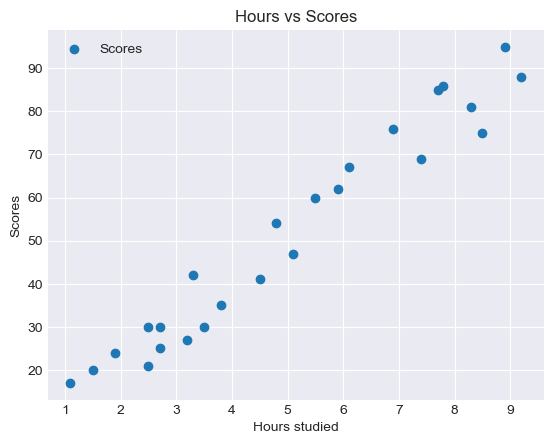

In [30]:
# Relation between hours and score
plt.scatter('Hours','Scores',data=df,marker='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

From the above scatter plot, a linear relationship can be observed between scores and number of hours spent studying.

##  Spliting the data

In [84]:
x = df.iloc[:,:-1]
y = df.iloc[:,1]

In [87]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [89]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [75]:
# Training and tesing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =0)

In [125]:
print('---------- Training data ----------')
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)

print('----------- Testing data -----------')
print('Shape of y_train:',x_test.shape)
print('Shape of y_train:',y_test.shape)

---------- Training data ----------
Shape of x_train: (20, 1)
Shape of y_train: (20,)
----------- Testing data -----------
Shape of y_train: (5, 1)
Shape of y_train: (5,)


## Building Model

In [77]:
# Build linear regression model
linear = LinearRegression()
linear

LinearRegression()

In [113]:
linear.fit(x_train, y_train)
print('Completed the training of model.')

Completed the training of model.


In [79]:
# Regression Line
coef = linear.coef_
intercept = linear.intercept_
print('Value of slope:', coef)
print('Value of intercept:',intercept)

# Regression Line equation
reg_line = coef*x + intercept

Value of slope: [9.91065648]
Value of intercept: 2.018160041434683


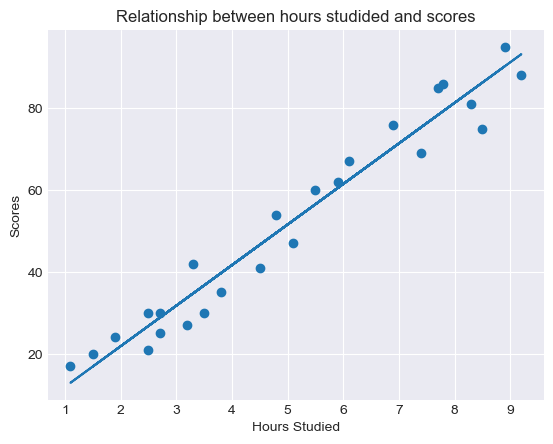

In [115]:
# Plotting the regression line
plt.scatter(x, y)
plt.plot(x, reg_line)
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Relationship between hours studided and scores')
plt.show()

In [80]:
# Prediction
y_pred = linear.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [118]:
# Comparing the predicted values
data = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
data

,Actual Values,Predicted Values
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [121]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# To understand whether the model is fitting or not
r2   = r2_score(y_test, y_pred)

print("---------- Testing performance ----------")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2)) # r2 lies from 0 to 1 , 1 = very good

---------- Testing performance ----------
RMSE: 4.65
R2: 0.95


- Question : <br> What will be the predicted score if a student studies for 9.25 hour/day?

In [109]:
time = [[9.25]]
task_pred = linear.predict(time)
print('No of Hours studied:',time,'hours')
print('Predicted Score:', task_pred[0])

No of Hours studied: [[9.25]] hours
Predicted Score: 93.69173248737538
